In [43]:
import networkx as nx
import numpy as np
from scipy.io import mmread
from scipy.linalg import sqrtm, inv
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs
from sklearn.cluster import KMeans

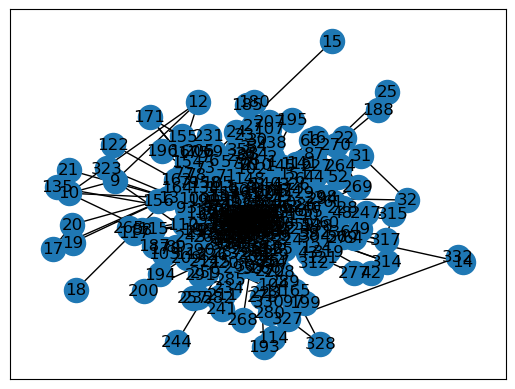

In [27]:
G = G=nx.read_weighted_edgelist("C:/Users/bartb/OneDrive/Documents/Uni/2AMS30 - Network Statistics for Data Science/2AMS30---G7/inf-USAir97.mtx")
nx.draw_networkx(G)

Let's try to run the algorithm on just airports in the mainland USA (excluding Alaska and Hawaii). The first US airport is at node 39: Bellingham International. The last one is at node 311: Miami Intl.

In [28]:
US_airports = list(range(39, 312))
US_airports_str = [str(airport) for airport in US_airports]
non_US_airports = [airport for airport in list(G.nodes()) if airport not in US_airports_str]
print(non_US_airports)

['2', '1', '4', '8', '5', '3', '26', '7', '6', '13', '16', '23', '24', '27', '28', '30', '34', '35', '36', '37', '38', '313', '10', '9', '11', '12', '14', '15', '17', '18', '19', '20', '21', '22', '25', '29', '31', '33', '32', '316', '321', '320', '322', '324', '325', '318', '331', '312', '314', '315', '317', '319', '326', '329', '323', '328', '327', '330', '332']


Graph with 273 nodes and 1963 edges


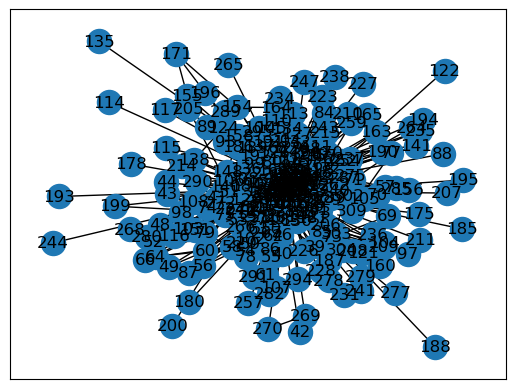

In [30]:
G_reduced = G.copy()
G_reduced.remove_nodes_from(non_US_airports)
print(G_reduced)
nx.draw_networkx(G_reduced)

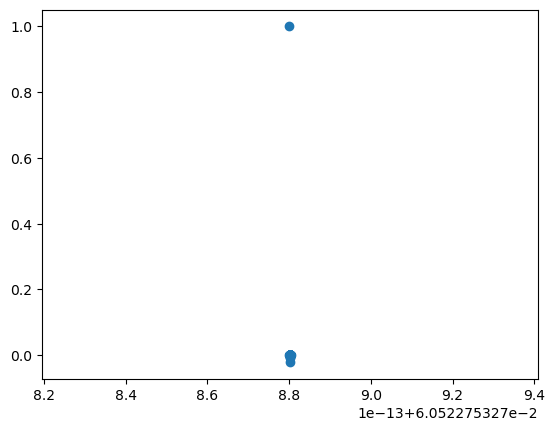

In [90]:
from scipy.sparse import csr_matrix


L = nx.laplacian_matrix(G_reduced)
degrees = np.diag([G_reduced.degree(n) for n in G_reduced.nodes()])
D_inv = np.linalg.inv(degrees)
L_rw = D_inv @ L.toarray()
L_rw_sparse = csr_matrix(L_rw)  

M = L_rw_sparse.asfptype()
vals, vecs = eigs(M,2,which='SR')
X = np.real(vecs)
fig = plt.figure()
plt.scatter(X[:,0],X[:,1])

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
variances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=99)
    kmeans.fit(X_scaled)
    variances.append(kmeans.inertia_)

print(variances)

[272.99999999999994, 0.15014805409754925, 0.029576623495465405, 0.005417711391668363, 0.0021294909552249126, 0.0011095387693189898, 0.0007565371830285213, 0.00042187776738394553, 0.0003076973146577392, 0.00019185677595540644]


c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

Text(0.5, 1.0, 'Intertia for different numbers of clusters')

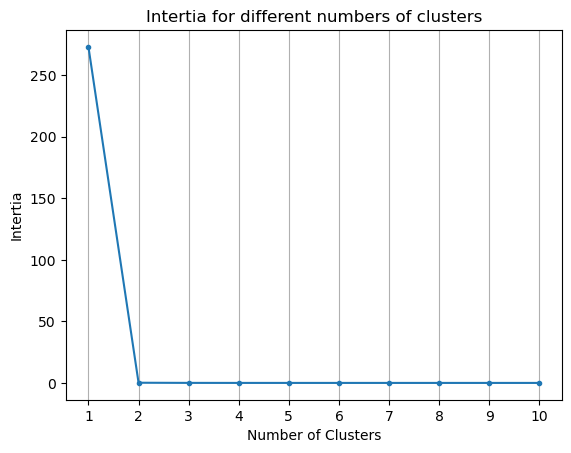

In [92]:
plt.figure()
plt.grid(axis='x', which='major')

plt.plot(range(1,11), variances, marker='.')
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia')
plt.title('Intertia for different numbers of clusters')


c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 4 0 0 0 4 0 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 3 4 0 4 0 0 0 0 0
 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 4 4 0 0 0 0 0 0 0 0 0 0 0 0]


c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


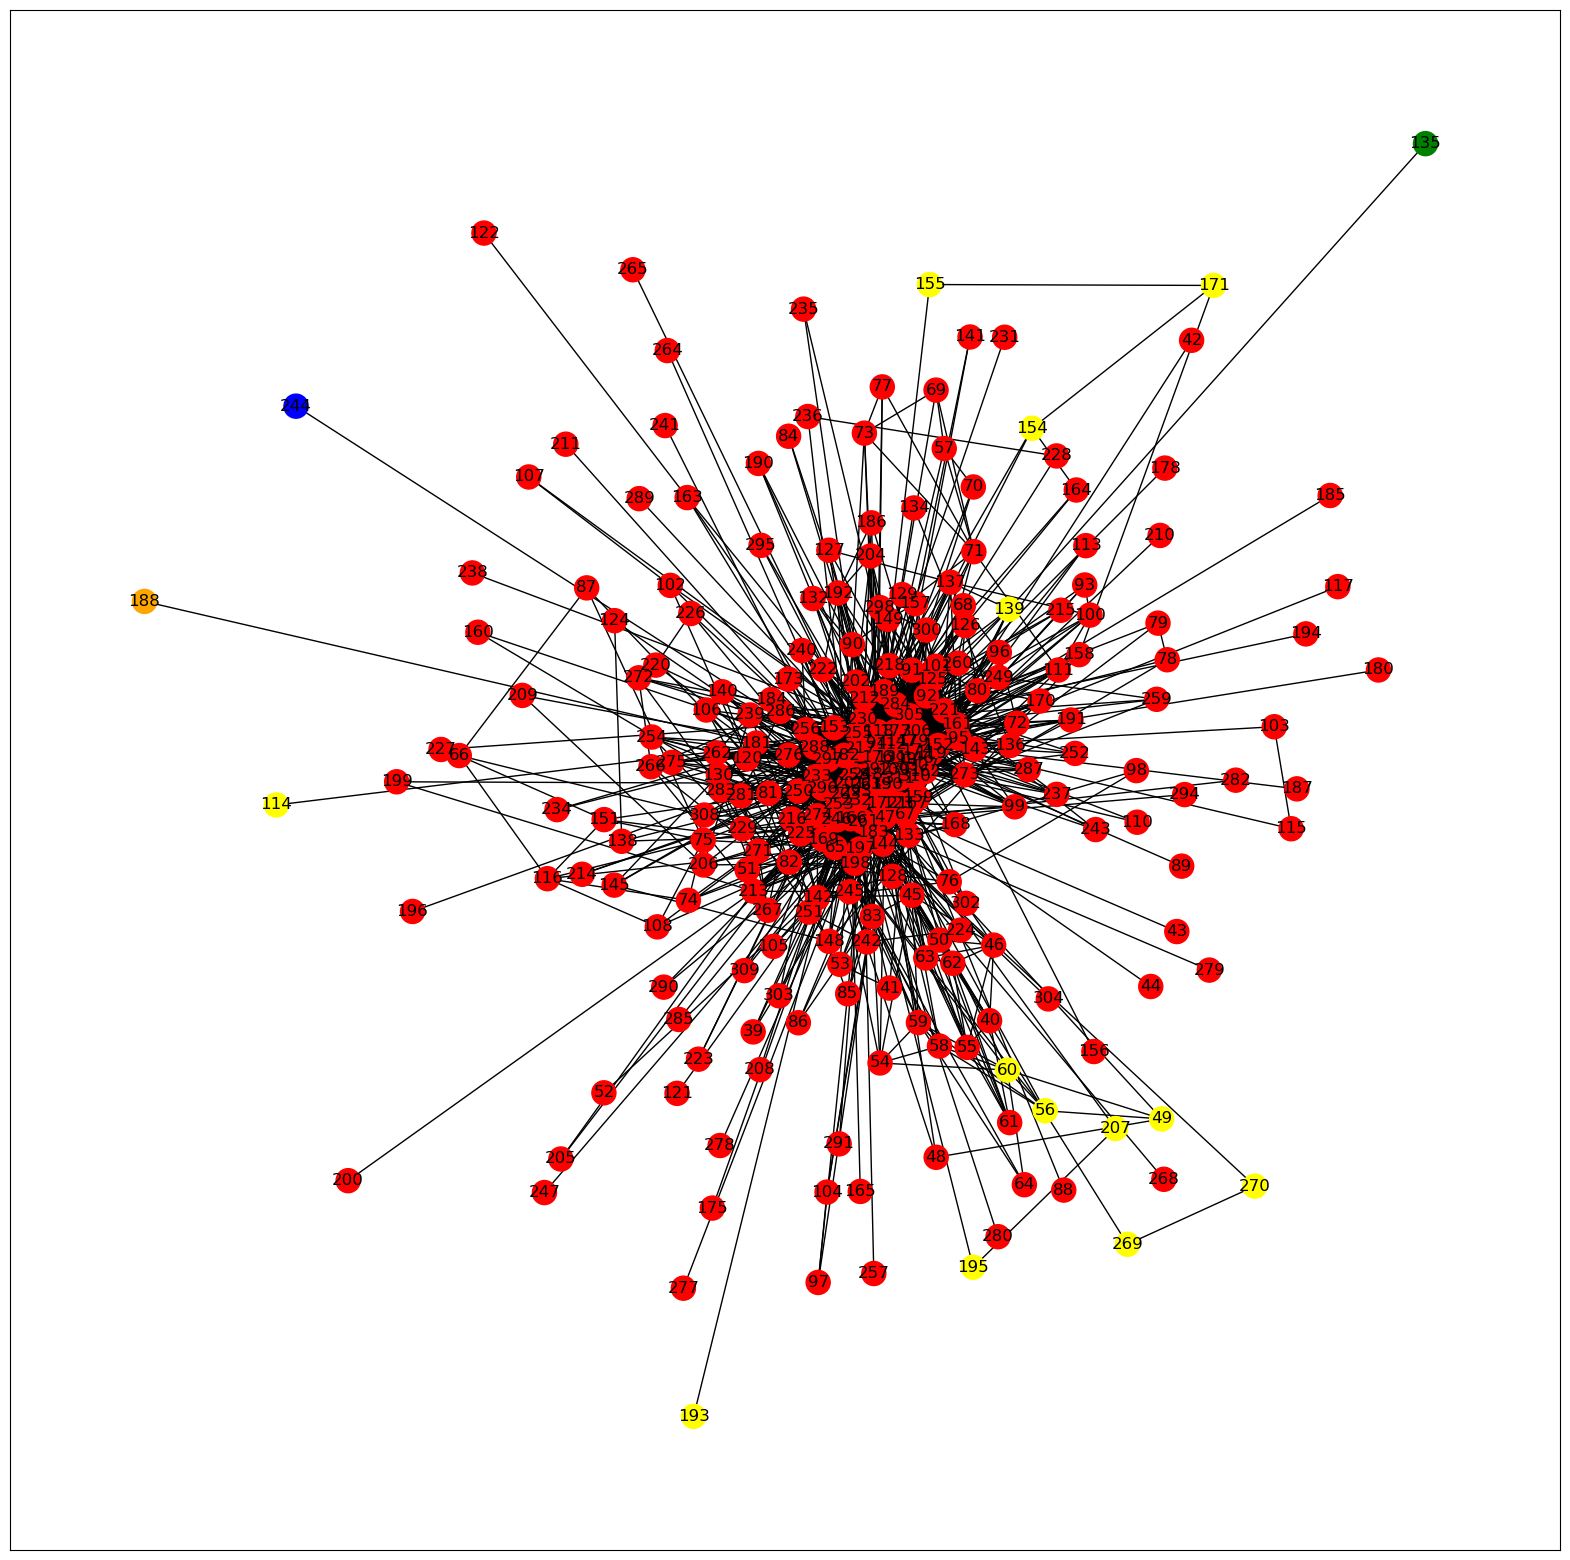

In [94]:
kmeans = KMeans(n_clusters=5, n_init=100, random_state=99)
kmeans.fit(X_scaled)

labels = kmeans.labels_
print(kmeans.labels_)
color_map = []
colors = ['red', 'blue', 'green', 'orange', 'yellow']  
for label in labels:
    color_map.append(colors[label])

plt.figure(figsize=(20,20));
nx.draw_networkx(G_reduced, node_color=color_map, cmap=plt.cm.jet, pos=nx.spring_layout(G_reduced))



The yellow nodes correspond to the following areas:
- Washington State, close to Seattle (49)
- Washington State, close to Seattle (56)
- Washington State (60)
- Rockford, Illinois (114)
- North Canton, Ohio (139)
- Bloomington, Illinois (154)
- West-Lafayette, Indiana (155)
- Egg-Harbour Township, New Jersey (170)
- Terre Haute, Indiana (171)
- Stockton, California (193)
- Marion, Illinois (195)
- Cape Girardeau, Montana (207)
- Longview, Texas (269)
- Tyler, Texas (270)

1. Washington - 3
1. Illinois - 3
2. Indiana - 2
2. Texas - 2
3. Ohio - 1
3. New Jersey - 1
3. California - 1
3. Montana - 1

The one green node corresponds to an airport in Youngstown, Ohio.

The one orange node corresponds to an airport Pueblo, Colorado.

The one blue node corresponds to an airport Oxnard, California.

